In [67]:
%matplotlib inline
plt.rcParams['figure.figsize'] = (12, 6) 

In [2]:
# Generate example data
import random
import numpy as np
import matplotlib.pyplot as plt
# 5000 points gaussian distributed in a circle of radius '20'
n1 = 5000
mu, sigma = 0, 10
r = np.random.uniform(mu,sigma, size=n1)
theta = np.random.uniform(low=0,high=2*np.pi, size=n1)
data = data_xs, data_ys = r * np.cos(theta), r * np.sin(theta)

# second 'arc' of points to also cluster
n2 = n1//20
mu1, sigma1 = 1, 30
r1 = np.random.uniform(low=50, high=60, size=n2)
theta1 = np.random.uniform(low=1.5, high=2.0,size=n2)
data1 = data1_xs, data1_ys = r1 * np.cos(theta1), r1 * np.sin(theta1)

# uniform distributed "noise"
n3 = n1//10
noise_min, noise_max = mu-6*sigma, mu+6*sigma
noise = noise_xs, noise_ys = np.random.uniform(low=noise_min, high=noise_max, size=n3), np.random.uniform(low=noise_min, high=noise_max, size=n3)

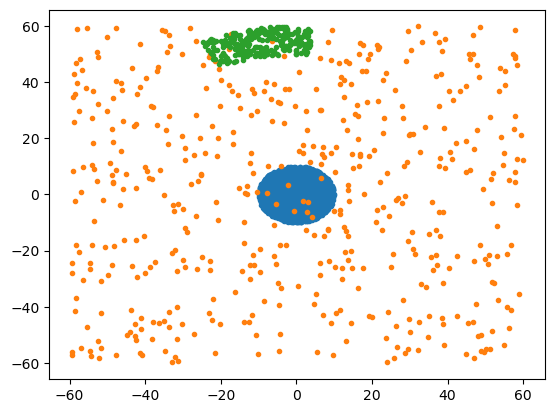

In [3]:
plt.plot(data_xs,data_ys, '.', color='C0')
plt.plot(noise_xs,noise_ys, '.', color='C1')
plt.plot(data1_xs,data1_ys, '.', color='C2')

In [4]:
from sklearn.cluster import DBSCAN
# DBSCAN.fit%matplotlib inline expects a an array where each entry is a "point"
X = []
for (x,y) in zip(data_xs, data_ys):
    X.append([x,y])

for (x,y) in zip(data1_xs, data1_ys):
    X.append([x,y])

for (x,y) in zip(noise_xs, noise_ys):
    X.append([x,y])


X = np.array(X)

In [5]:
print(len(X) == n1+n2+n3)

True


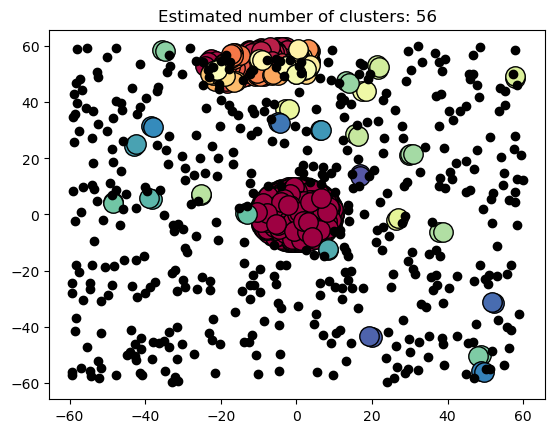

In [6]:
db = DBSCAN(eps=1, min_samples=2).fit(X)
labels = db.labels_
#print(len(X), len(labels), len(core_samples_mask))

unique_labels = set(labels)
core_samples_mask = np.zeros_like(labels, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = labels == k

    xy = X[class_member_mask & core_samples_mask]
    plt.plot(
        xy[:, 0],
        xy[:, 1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=14,
    )

    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(
        xy[:, 0],
        xy[:, 1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=6,
    )

plt.title(f"Estimated number of clusters: {len(unique_labels)}")
plt.show()

In [56]:
import subprocess
file_num='000007'
event_num=307
try:
    MACRO_CALL = f'runHGTD_Clustering.cxx("{file_num}",{event_num})'
    result = subprocess.run(['root', '-l', '-q', '-b', MACRO_CALL],
                            check=True, capture_output=True, text=True)

    print(result.stdout)
    track_clusters = []
    cluster_times, cluster_zs = [], []
    track_times = []
    all_times = []
    idx_time_dict = dict()
    all_indices = []
    current_block_idx = []
    current_block_times = []

    for line in result.stdout.splitlines():
        line = line.strip()
        if line == "---------":
            if current_block_idx:
                track_clusters.append(current_block_idx)
                track_times.append(current_block_times)
                current_block_idx = []
                current_block_times = []
            continue
        if "t:" in line:
            cluster_times.append(float(line[2:]))
        try:
            tup = line.split(",")
            trk_idx = int(tup[0])
            trk_time = float(tup[1])
            current_block_idx.append(trk_idx)
            current_block_times.append(trk_time)
            all_times.append(trk_time)
            all_indices.append(trk_idx)
            idx_time_dict[trk_idx] = trk_time
        except (ValueError, IndexError):
            continue
    if current_block_idx:
        track_clusters.append(current_block_idx)
        track_times.append(current_block_times)
except subprocess.CalledProcessError as e:
    print(f"Error executing root script: {e.stderr}")
    track_clusters = []
    cluster_times = []



Processing runHGTD_Clustering.cxx("000007",307)...
---------
t: 115.042
score: 9.52802
2039,121.575
13,113.945
366,164.865
1273,141.587
1338,79.4077
1465,79.906
1563,128.512
1637,115.109
1662,130.033
1715,20.4029
1762,156.944
1793,69.5286
1803,192.65
1902,152.541
1950,126.781
passes? 1
---------
---------
t: -126.382
score: 2.23361
1973,-96.458
1086,-48.8186
1402,-15.8701
1719,-27.4429
1884,-108.966
1934,-81.1605
2003,-33.7772
1905,-214.042
1547,-144.75
1552,-189.622
1621,-136.982
1732,-142.366
1923,-122.369
1941,-202.113
2072,-220.766
2088,-118.807
2145,-195.094
passes? 0
---------
---------
t: 1145.12
score: 0.000316775
1627,1145.12
passes? 0
---------
---------
t: 680.851
score: 0.0710431
1599,680.851
passes? 0
---------



In [53]:
print(all_times)

[121.575, 113.945, 164.865, 141.587, 79.4077, 79.906, 128.512, 115.109, 130.033, 20.4029, 156.944, 69.5286, 192.65, 152.541, 126.781, -96.458, -48.8186, -15.8701, -27.4429, -108.966, -81.1605, -33.7772, -214.042, -144.75, -189.622, -136.982, -142.366, -122.369, -202.113, -220.766, -118.807, -195.094, 1145.12, 680.851]


34
34


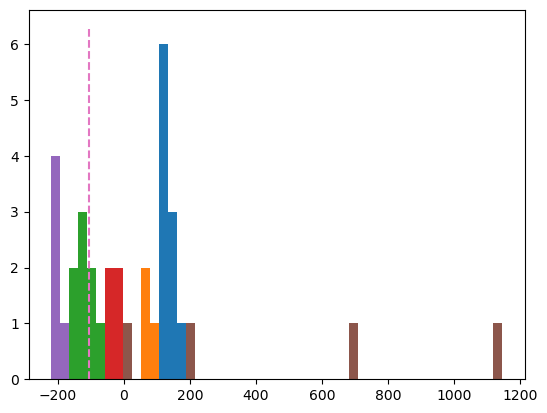

In [54]:
reshaped_times = np.array(all_times).reshape(-1, 1)
timehist = DBSCAN(eps=25,min_samples=3).fit(reshaped_times)
cluster_labels = timehist.labels_
unique_labels  = set(cluster_labels)
core_samples_mask = np.zeros_like(cluster_labels, dtype=bool)
core_samples_mask[timehist.core_sample_indices_] = True
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]

print(len(reshaped_times))
print(len(timehist.labels_))
clusters = {x:[] for x in unique_labels}
for (time,label) in zip(reshaped_times,cluster_labels):
    clusters[label].append(time[0])

plt.hist(clusters.values(), bins=50, stacked=True);
#plt.hist(all_times,50)
plt.plot([-105.8]*2, list(plt.ylim()), linestyle='--')

In [63]:
import uproot
ANA_FILE = f'../ntuple-hgtd/user.mcardiff.45809429.Output._{file_num}.SuperNtuple.root'
tree = uproot.open(ANA_FILE)["ntuple"]
branch = tree.arrays(['Track_time','Track_timeRes','TruthVtx_time', 'Track_pt'])

def custom_dist(x,y):
    """Get the distance in res units, where x and y are 'raw' ntuple track indices"""
    x_t, x_s = idx_time_dict[x], branch.Track_timeRes[event_num][x]
    y_t, y_s = idx_time_dict[y], branch.Track_timeRes[event_num][y]
    diff = np.abs(x_t-y_t)
    return diff / np.sqrt(x_s**2+y_s**2)

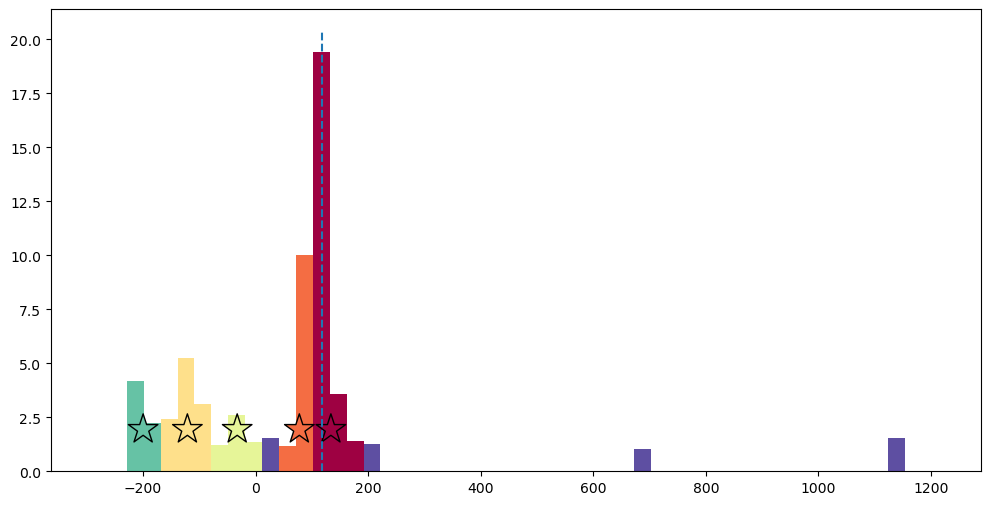

In [78]:
reshaped_indices = np.array(all_indices).reshape(-1, 1)

idxhist = DBSCAN(eps=3,min_samples=2).fit(reshaped_indices)
cluster_labels = timehist.labels_
unique_labels  = set(cluster_labels)
core_samples_mask = np.zeros_like(cluster_labels, dtype=bool)
core_samples_mask[timehist.core_sample_indices_] = True
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]

idx_clusters = {x:[] for x in unique_labels}
time_clusters = {x:[] for x in unique_labels}
idx_weights  = {x:[] for x in unique_labels}
for (idx,label) in zip(reshaped_indices,cluster_labels):
    time_clusters[label].append(idx_time_dict[idx[0]])
    idx_clusters[label].append(idx[0])
    idx_weights[label].append(branch.Track_pt[event_num][idx[0]])

extended_min_time = min(all_times) - 0.05 * (max(all_times) - min(all_times))
extended_max_time = max(all_times) + 0.05 * (max(all_times) - min(all_times))

# Find the cluster values using the weighted avg procedure:
cluster_values = dict()
for label,indices in idx_clusters.items():
    if label == -1:
        continue
    num, den = 0.0,0.0
    for idx in indices:
        t, s = idx_time_dict[idx], branch.Track_timeRes[event_num][idx]
        num += t/(s*s)
        den += 1/(s*s)
    cluster_values[label] = num/den

histvals, bin_edges, patches = plt.hist(
    time_clusters.values(), weights=idx_weights.values(), bins=50, stacked=True,
    range=(extended_min_time, extended_max_time), color=colors)
plt.plot([branch.TruthVtx_time[event_num][0]]*2, list(plt.ylim()), linestyle='--')
plt.scatter(cluster_values.values(), [0.1*histvals.max()]*len(cluster_values.values()),
            marker="*", edgecolors='black',
            s=500, color=colors[:len(cluster_values.values())],)


{np.int64(0): np.float32(133.71251), np.int64(1): np.float32(77.6312), np.int64(2): np.float32(-121.33523), np.int64(3): np.float32(-32.80189), np.int64(4): np.float32(-199.9639), np.int64(-1): np.float32(411.88538)}
